<a href="https://colab.research.google.com/github/MNaumanShahid/Predict_Startup_Profit/blob/main/Predict_profit_startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Profit of Startup

##Importing libraries

In [ ]:
# %pip install --upgrade plotly

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

##Importing dataset

In [4]:
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)
print(y)

##Preliminary Data Exploration

In [6]:
dataset.shape

(50, 5)

In [7]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


##Data Cleaning

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##Visualising Features

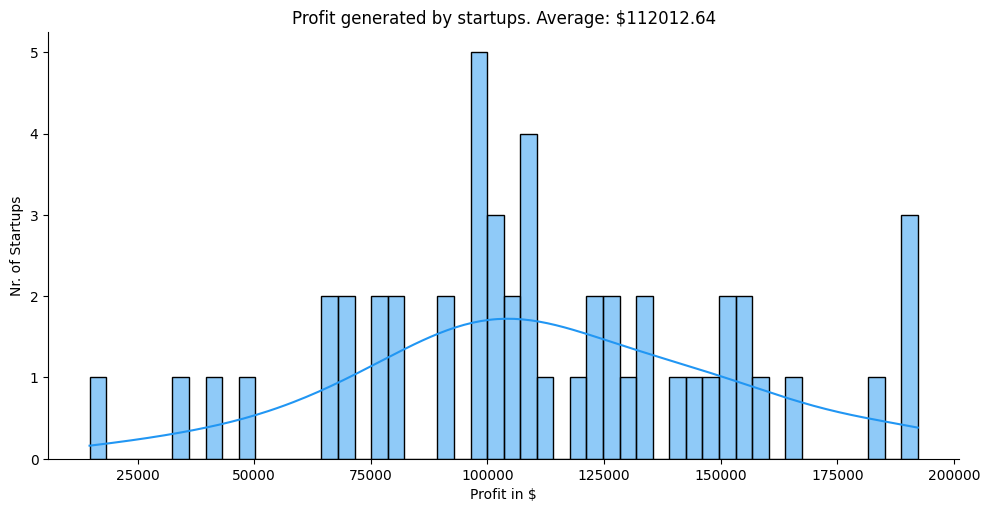

In [13]:
sns.displot(dataset['Profit'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'Profit generated by startups. Average: ${(dataset.Profit.mean()):.8}')
plt.xlabel('Profit in $')
plt.ylabel('Nr. of Startups')

plt.show()

##Encoding Categorical Data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


##Splitting dataset into Training Set and Test Set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Training the Multiple Linear Regression model on the Training Set

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
r_squared = regressor.score(X_train, y_train)
print(f"Training data r-squared: {r_squared:.2}")

Training data r-squared: 0.95


##Predicting Test Set results

In [23]:
y_pred = regressor.predict(X_test)

###Comparing Actual vs Predicted Profit

In [24]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


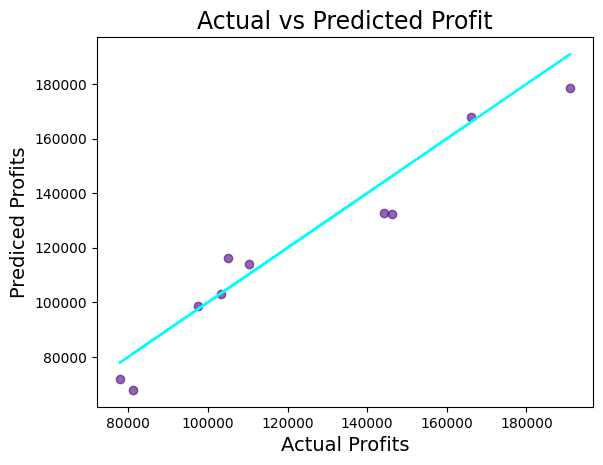

In [29]:
plt.figure(dpi=100)
plt.scatter(x=y_test, y=y_pred, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Profit', fontsize=17)
plt.xlabel('Actual Profits', fontsize=14)
plt.ylabel('Prediced Profits', fontsize=14)
plt.show()

##Model performance r-squared

In [30]:
print(f"Model test data r-squared: {regressor.score(X_test, y_test):.2}")

Model test data r-squared: 0.93


##The final linear regression equation with the values of the coefficients

In [31]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of the multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [36]:
example_profit = regressor.predict([[1, 0, 0, 160000, 130000, 300000]])[0]
print(f"The predicted profit is: ${example_profit:.8}")

The predicted profit is: $181566.92
